In [50]:
import numpy as np
import pandas as pd
from scipy.spatial import distance
from scipy.spatial.distance import pdist
from sklearn.cluster import KMeans as kmeans,AgglomerativeClustering as hclust
from scipy.cluster.hierarchy import dendrogram,ward

In [51]:
movies = pd.read_csv("http://files.grouplens.org/datasets/movielens/ml-100k/u.item",header=None,sep='|',encoding='iso-8859-1')

In [52]:
movies.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [53]:
movies.shape

(1682, 24)

In [54]:
movies.columns=["ID", "Title", "ReleaseDate", "VideoReleaseDate", "IMDB", "Unknown", "Action", "Adventure", "Animation", "Children", "Comedy", "Crime", "Documentary", "Drama", "Fantasy", "FilmNoir", "Horror", "Musical", "Mystery", "Romance", "SciFi", "Thriller", "War", "Western"]

In [55]:
movies.head()

,ID,Title,ReleaseDate,VideoReleaseDate,IMDB,Unknown,Action,Adventure,Animation,Children,...,Fantasy,FilmNoir,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [56]:
del movies['ID']

In [57]:
del movies['ReleaseDate']

In [58]:
del movies['VideoReleaseDate']

In [59]:
del movies['IMDB']

In [60]:
movies.head()

,Title,Unknown,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,Toy Story (1995),0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,GoldenEye (1995),0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,Four Rooms (1995),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,Get Shorty (1995),0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Copycat (1995),0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [61]:
movies.shape

(1682, 20)

In [62]:
movies.drop_duplicates(inplace=True)

In [63]:
movies.shape

(1664, 20)

In [64]:
movies.Romance.value_counts()


0    1420
1     244
Name: Romance, dtype: int64

In [65]:
movies.groupby(['Action','Drama'])['Drama'].count()

Action  Drama
0       0        745
        1        670
1       0        203
        1         46
Name: Drama, dtype: int64

In [66]:
is_action = movies['Action'] == 1
is_drama = movies['Drama'] == 1
movies[is_action & is_drama]['Title'].count()

46

In [67]:
dist = pdist(movies.iloc[:,1:20],'euclidean')

In [68]:
dist

array([2.44948974, 2.        , 2.        , ..., 1.73205081, 1.73205081,
       1.41421356])

In [69]:
dist.min(),dist.max(),len(dist),dist.std()

(0.0, 3.1622776601683795, 1383616, 0.5700099571050707)

In [70]:
model = hclust(affinity='euclidean',linkage="ward",n_clusters=10)

In [71]:
model.fit(movies.iloc[:,1:20])

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=10,
            pooling_func='deprecated')

In [72]:
model.n_clusters

10

In [73]:
model.labels_

array([6, 3, 7, ..., 5, 0, 9])

In [74]:
np.unique(model.labels_,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([433, 119, 146,  96,  69, 121,  88, 161,  61, 370]))

In [75]:
z=ward(movies.iloc[:,1:20])
z

array([[0.00000000e+00, 4.18000000e+02, 0.00000000e+00, 2.00000000e+00],
       [1.00000000e+00, 1.16000000e+02, 0.00000000e+00, 2.00000000e+00],
       [2.00000000e+00, 1.97000000e+02, 0.00000000e+00, 2.00000000e+00],
       ...,
       [3.32000000e+03, 3.32200000e+03, 1.53134543e+01, 6.79000000e+02],
       [3.32300000e+03, 3.32400000e+03, 2.13607769e+01, 1.23100000e+03],
       [3.31700000e+03, 3.32500000e+03, 2.39336022e+01, 1.66400000e+03]])

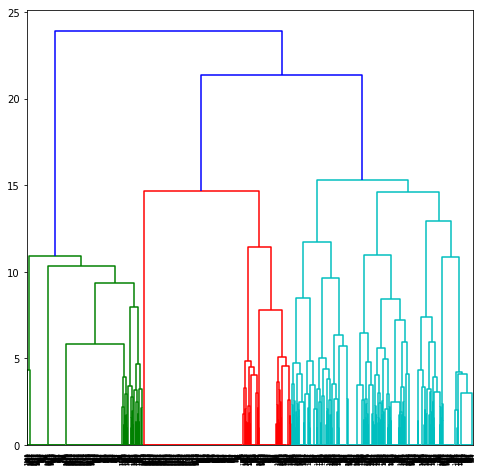

In [76]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
x= dendrogram(z)

In [77]:
movies['clusters'] = model.labels_

In [78]:
movies

,Title,Unknown,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,FilmNoir,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western,clusters
0,Toy Story (1995),0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,6
1,GoldenEye (1995),0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,3
2,Four Rooms (1995),0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,7
3,Get Shorty (1995),0,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,Copycat (1995),0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,4
5,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,9
6,Twelve Monkeys (1995),0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,2
7,Babe (1995),0,0,0,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,6
8,Dead Man Walking (1995),0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,9
9,Richard III (1995),0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,8


In [79]:
movies.groupby(by='clusters').mean()

,Unknown,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western
clusters,,,,,,,,,,,,,,,,,,,
0,0.000000,0.064665,0.027714,0.000000,0.009238,0.921478,0.002309,0.000000,0.210162,0.000000,0.000000,0.004619,0.080831,0.000000,0.207852,0.006928,0.002309,0.004619,0.055427
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.092437,0.000000,0.411765,0.067227,0.000000,0.000000,0.588235,0.000000,0.000000,0.016807,0.000000,0.092437,0.000000,0.000000
2,0.000000,0.794521,0.027397,0.006849,0.000000,0.061644,0.047945,0.000000,0.212329,0.000000,0.000000,0.095890,0.000000,0.000000,0.000000,0.369863,0.383562,0.027397,0.000000
3,0.020833,0.510417,0.968750,0.041667,0.364583,0.010417,0.000000,0.000000,0.104167,0.093750,0.000000,0.000000,0.031250,0.020833,0.000000,0.270833,0.197917,0.000000,0.020833
4,0.000000,0.202899,0.086957,0.000000,0.000000,0.173913,1.000000,0.000000,0.478261,0.000000,0.000000,0.028986,0.000000,0.014493,0.057971,0.014493,0.202899,0.000000,0.000000
5,0.000000,0.173554,0.107438,0.000000,0.008264,0.016529,0.016529,0.000000,0.595041,0.000000,0.008264,0.000000,0.000000,0.000000,1.000000,0.024793,0.099174,0.033058,0.000000
6,0.000000,0.034091,0.022727,0.409091,0.875000,0.454545,0.011364,0.000000,0.159091,0.136364,0.000000,0.000000,0.204545,0.000000,0.045455,0.045455,0.011364,0.000000,0.000000
7,0.000000,0.037267,0.000000,0.000000,0.012422,0.111801,0.167702,0.000000,0.316770,0.006211,0.142857,0.012422,0.000000,0.354037,0.068323,0.037267,0.801242,0.000000,0.000000
8,0.000000,0.196721,0.049180,0.016393,0.016393,0.163934,0.000000,0.016393,0.590164,0.000000,0.000000,0.000000,0.000000,0.000000,0.196721,0.049180,0.081967,1.000000,0.016393


In [80]:
movies.groupby(['clusters','Romance'])['clusters'].count()

clusters  Romance
0         0          343
          1           90
1         0          117
          1            2
2         0          146
3         0           96
4         0           65
          1            4
5         1          121
6         0           84
          1            4
7         0          150
          1           11
8         0           49
          1           12
9         0          370
Name: clusters, dtype: int64

In [81]:
movies[movies.Title.str.contains('Men in Black')]['clusters']

256    0
Name: clusters, dtype: int64

In [82]:
movies[movies['clusters']==0]['Title'].iloc[0:10]

3                                     Get Shorty (1995)
12                              Mighty Aphrodite (1995)
15                   French Twist (Gazon maudit) (1995)
20                        Muppet Treasure Island (1996)
24                                 Birdcage, The (1996)
25                        Brothers McMullen, The (1995)
33                          Doom Generation, The (1995)
39    To Wong Foo, Thanks for Everything! Julie Newm...
40                                 Billy Madison (1995)
41                                        Clerks (1994)
Name: Title, dtype: object

In [83]:
km = kmeans(n_clusters=10,random_state=42)

In [84]:
km.fit(movies.iloc[:,1:20])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [85]:
km.labels_

array([8, 0, 5, ..., 5, 2, 1], dtype=int32)

In [86]:
movies['kmeansclust'] = km.labels_

In [87]:
km.n_iter_,km.max_iter

(7, 300)

In [88]:
km.inertia_

910.9015174253699

###### movies.head(2)

In [89]:
pd.Series(km.labels_).value_counts().sort_index()

0    189
1    511
2    305
3     64
4    131
5    168
6     50
7     86
8     82
9     78
dtype: int64

In [90]:
km.cluster_centers_

array([[ 2.81892565e-18,  1.00000000e+00,  3.49206349e-01,
         1.05820106e-02,  2.64550265e-02,  5.82010582e-02,
         8.99470899e-02,  3.46944695e-17,  5.82010582e-02,
         5.29100529e-03, -1.73472348e-17,  4.76190476e-02,
         1.05820106e-02,  3.70370370e-02,  8.46560847e-02,
         2.75132275e-01,  4.39153439e-01,  6.34920635e-02,
         1.05820106e-02],
       [-6.50521303e-18,  4.89236791e-02,  7.82778865e-03,
        -2.74086309e-16,  2.34833659e-02,  1.49880108e-15,
         5.67514677e-02,  1.83880688e-16,  1.00000000e+00,
         7.82778865e-03,  3.91389432e-03,  9.78473581e-03,
         1.56555773e-02,  1.56555773e-02,  1.02695630e-15,
         1.36986301e-02,  6.65362035e-02,  5.28375734e-02,
         7.82778865e-03],
       [ 3.46944695e-18,  4.91803279e-02,  3.27868852e-03,
         1.31147541e-02,  9.18032787e-02,  1.00000000e+00,
         2.62295082e-02,  1.21430643e-16, -1.83186799e-15,
         1.31147541e-02, -3.46944695e-17,  3.60655738e-02,
    

In [91]:
pd.DataFrame(km.cluster_centers_.round(2),columns=movies.columns[1:20],index=['Act-Adv-Scifi-Thr','Drama','Comedy','Horror','Rom-Com','Cri-Mys-Thr','Documentary','Rom-Drama','Adv-Anim-Child','Com-Drama'])

,Unknown,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western
Act-Adv-Scifi-Thr,0.00,1.00,0.35,0.01,0.03,0.06,0.09,0.0,0.06,0.01,-0.00,0.05,0.01,0.04,0.08,0.28,0.44,0.06,0.01
Drama,-0.00,0.05,0.01,-0.00,0.02,0.00,0.06,0.0,1.00,0.01,0.00,0.01,0.02,0.02,0.00,0.01,0.07,0.05,0.01
Comedy,0.00,0.05,0.00,0.01,0.09,1.00,0.03,0.0,-0.00,0.01,-0.00,0.04,0.03,0.02,0.00,0.02,0.02,0.03,0.02
Horror,0.00,0.06,-0.00,0.00,-0.00,0.00,0.00,0.0,0.00,-0.00,0.00,1.00,-0.00,0.02,0.03,0.06,0.20,0.00,-0.00
Rom-Com,0.00,0.02,0.05,0.01,0.01,0.73,-0.00,-0.0,0.08,0.01,0.00,0.00,0.08,0.02,1.00,0.01,0.03,0.03,0.00
Cri-Mys-Thr,0.01,-0.00,0.02,0.02,-0.00,0.01,0.27,0.0,0.07,0.01,0.13,0.01,0.03,0.20,0.04,0.13,0.61,0.04,0.08
Documentary,-0.00,-0.00,0.00,0.00,0.00,0.02,0.00,1.0,0.06,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.02,-0.00
Rom-Drama,0.00,0.08,0.02,0.00,-0.00,-0.00,0.05,-0.0,1.00,0.00,0.00,0.00,-0.00,0.03,1.00,0.01,0.06,0.09,0.01
Adv-Anim-Child,0.00,0.05,0.61,0.38,0.88,0.11,-0.00,-0.0,0.06,0.13,0.00,0.00,0.23,-0.00,0.04,0.07,-0.00,0.04,0.00
Com-Drama,0.00,0.04,0.01,0.00,0.03,1.00,0.05,0.0,1.00,-0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.01,0.03,0.00


In [92]:
movies[movies.Title.str.contains('Men in Black')]['kmeansclust']

256    0
Name: kmeansclust, dtype: int32

In [93]:
movies[movies['kmeansclust']==0]['Title'].iloc[0:10]

1                  GoldenEye (1995)
16       From Dusk Till Dawn (1996)
20    Muppet Treasure Island (1996)
23       Rumble in the Bronx (1995)
26                  Bad Boys (1995)
27                 Apollo 13 (1995)
28            Batman Forever (1995)
32                 Desperado (1995)
38              Strange Days (1995)
49                 Star Wars (1977)
Name: Title, dtype: object

In [96]:
withinss = []
for i in range(2,10):
    km=kmeans(n_clusters=i,n_init=10,random_state=42)
    withinss.append(km.fit(movies.iloc[:,1:20]),km.inertia_)

AttributeError: 'KMeans' object has no attribute 'inertia_'

In [ ]:
plt.plot(range(2,10),withinss,'-o')
plt.xlabel("Num of Clusters")
plt.ylabel("Total Within SS")
plt.xlim(1,22)